# Ensemble Methods
## 1. Load a dataset for classification Titanic dataset.
## 2. Implement ensemble methods (Random Forest, AdaBoost, Gradient Boosting) using scikit-learn.
## 3. Compare their performance and visualize the results.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

### Loading Dataset

In [2]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Preprocessing

In [6]:
# Check missing values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
# Select features and target
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = df[features].copy()
y = df['survived']

In [9]:
# Handle missing values
numeric_features = ['age', 'fare']
categorical_features = ['sex', 'embarked']

In [10]:
# Impute numeric features
num_imputer = SimpleImputer(strategy='median')
X[numeric_features] = num_imputer.fit_transform(X[numeric_features])

# Impute categorical features
cat_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_features] = cat_imputer.fit_transform(X[categorical_features])

In [11]:
# Encode categorical variables
le = LabelEncoder()
for feature in categorical_features:
    X[feature] = le.fit_transform(X[feature])

# Scale numerical features
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

print("Processed features shape:", X.shape)
X.head()

Processed features shape: (891, 7)


,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,-0.565736,1,0,-0.502445,2
1,1,0,0.663861,1,0,0.786845,0
2,3,0,-0.258337,0,0,-0.488854,2
3,1,0,0.433312,1,0,0.420730,2
4,3,1,0.433312,0,0,-0.486337,2


## Spliting of Data

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (712, 7)
Testing set shape: (179, 7)


## Model Training and Evaluation

In [14]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [15]:
# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'cv_scores': cross_val_score(model, X_train, y_train, cv=5),
        'feature_importance': model.feature_importances_
    }
    
    # Print classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))


Training Random Forest...

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179


Training AdaBoost...

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Training Gradient Boosting...

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75 

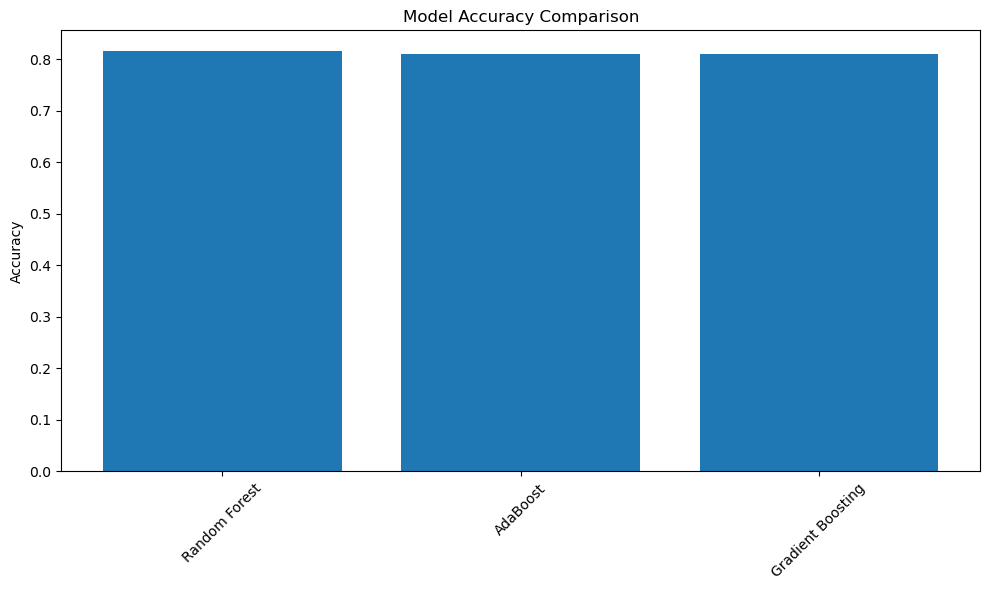

In [16]:
# Model Accuracy Comparison
plt.figure(figsize=(10, 6))
accuracies = [results[model]['accuracy'] for model in results]
plt.bar(results.keys(), accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

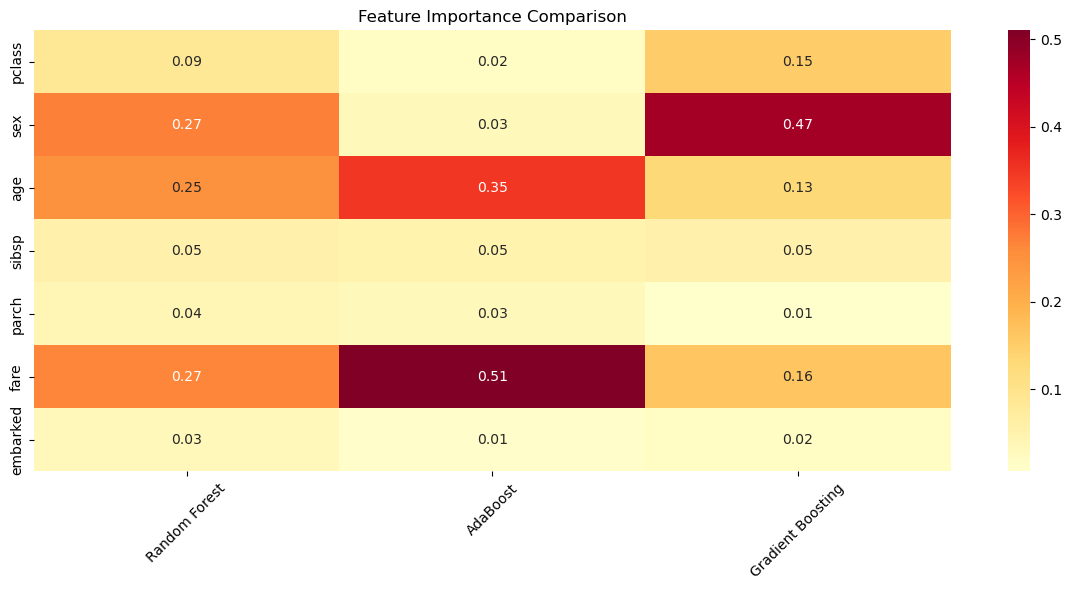

In [17]:
# Feature Importance Comparison
plt.figure(figsize=(12, 6))
feature_importance_df = pd.DataFrame()
for name, model_results in results.items():
    feature_importance_df[name] = model_results['feature_importance']
feature_importance_df.index = X.columns

sns.heatmap(feature_importance_df, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Feature Importance Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

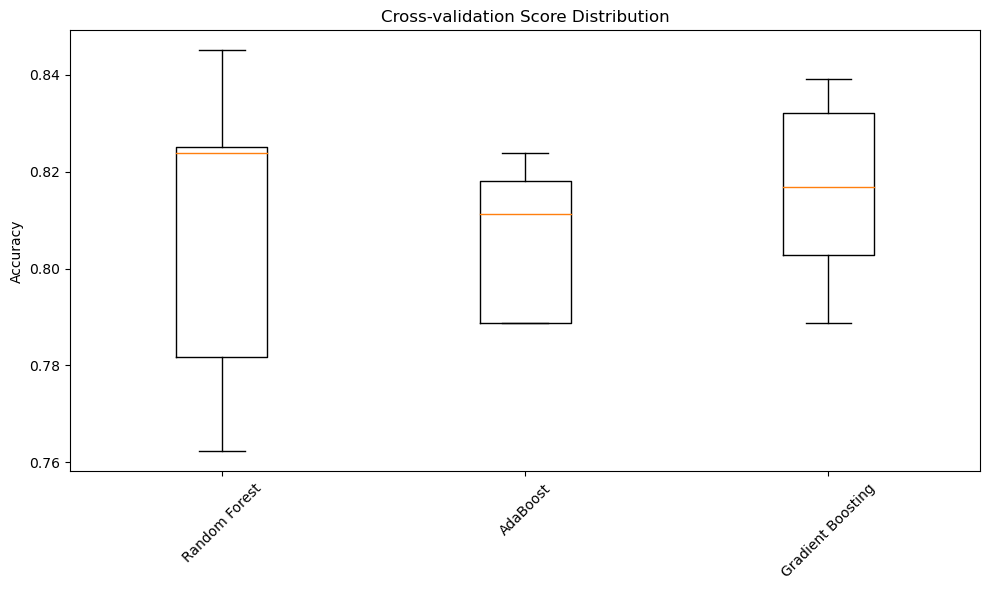

In [18]:
# Cross-validation Scores
plt.figure(figsize=(10, 6))
cv_scores = [results[model]['cv_scores'] for model in results]
plt.boxplot(cv_scores, labels=results.keys())
plt.title('Cross-validation Score Distribution')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Making Predictions with Best Model

In [19]:
# Example of making predictions with the Random Forest model
sample_passenger = X_test.iloc[0:5]  # Get first 5 passengers from test set
rf_predictions = models['Random Forest'].predict(sample_passenger)

# Create a DataFrame to display the results
prediction_df = pd.DataFrame({
    'Actual': y_test.iloc[0:5],
    'Predicted': rf_predictions,
    'Survived': ['Yes' if p == 1 else 'No' for p in rf_predictions]
})
print("Predictions for 5 sample passengers:")
prediction_df

Predictions for 5 sample passengers:


,Actual,Predicted,Survived
709,1,0,No
439,0,0,No
840,0,0,No
720,1,1,Yes
39,1,0,No
